In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('/Users/apple/Downloads/Project/Crop-Recommendation-System-end-to-end-project/research/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
df.shape

(2200, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Axes: xlabel='label'>

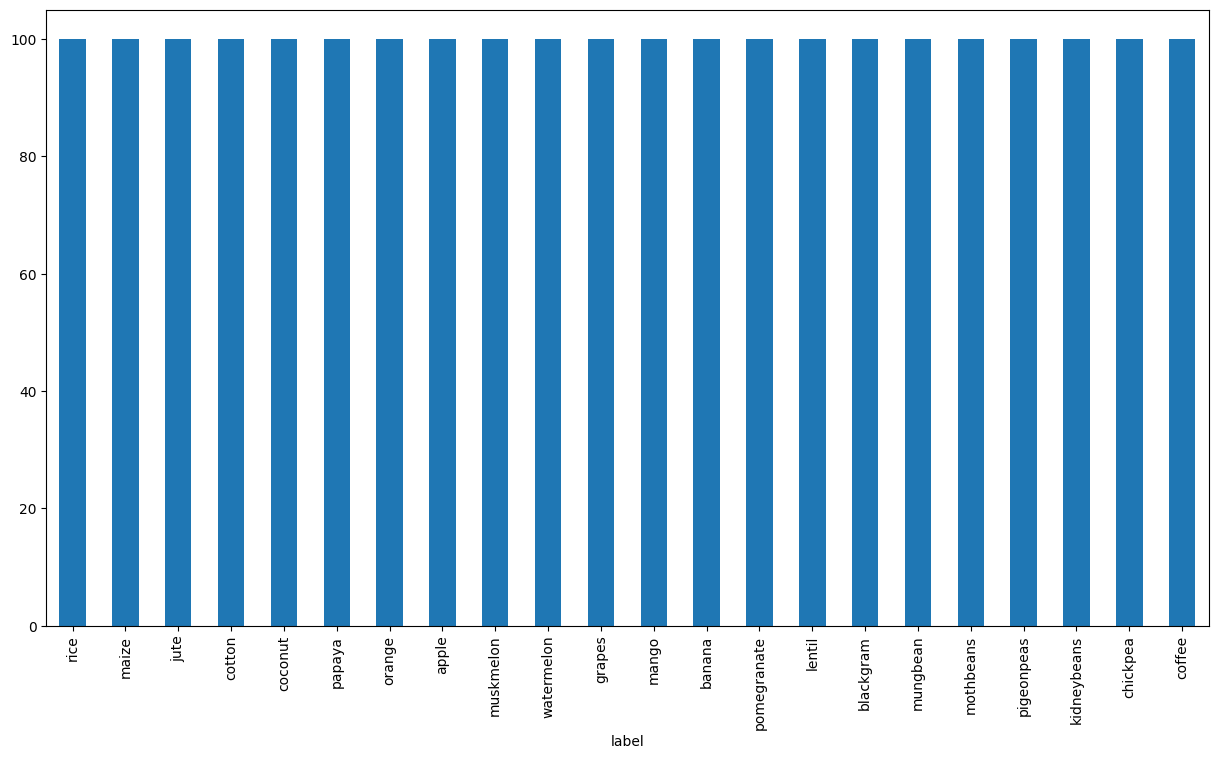

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
df['label'].value_counts().plot(kind='bar')

In [10]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


/opt/anaconda3/envs/mlproject3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


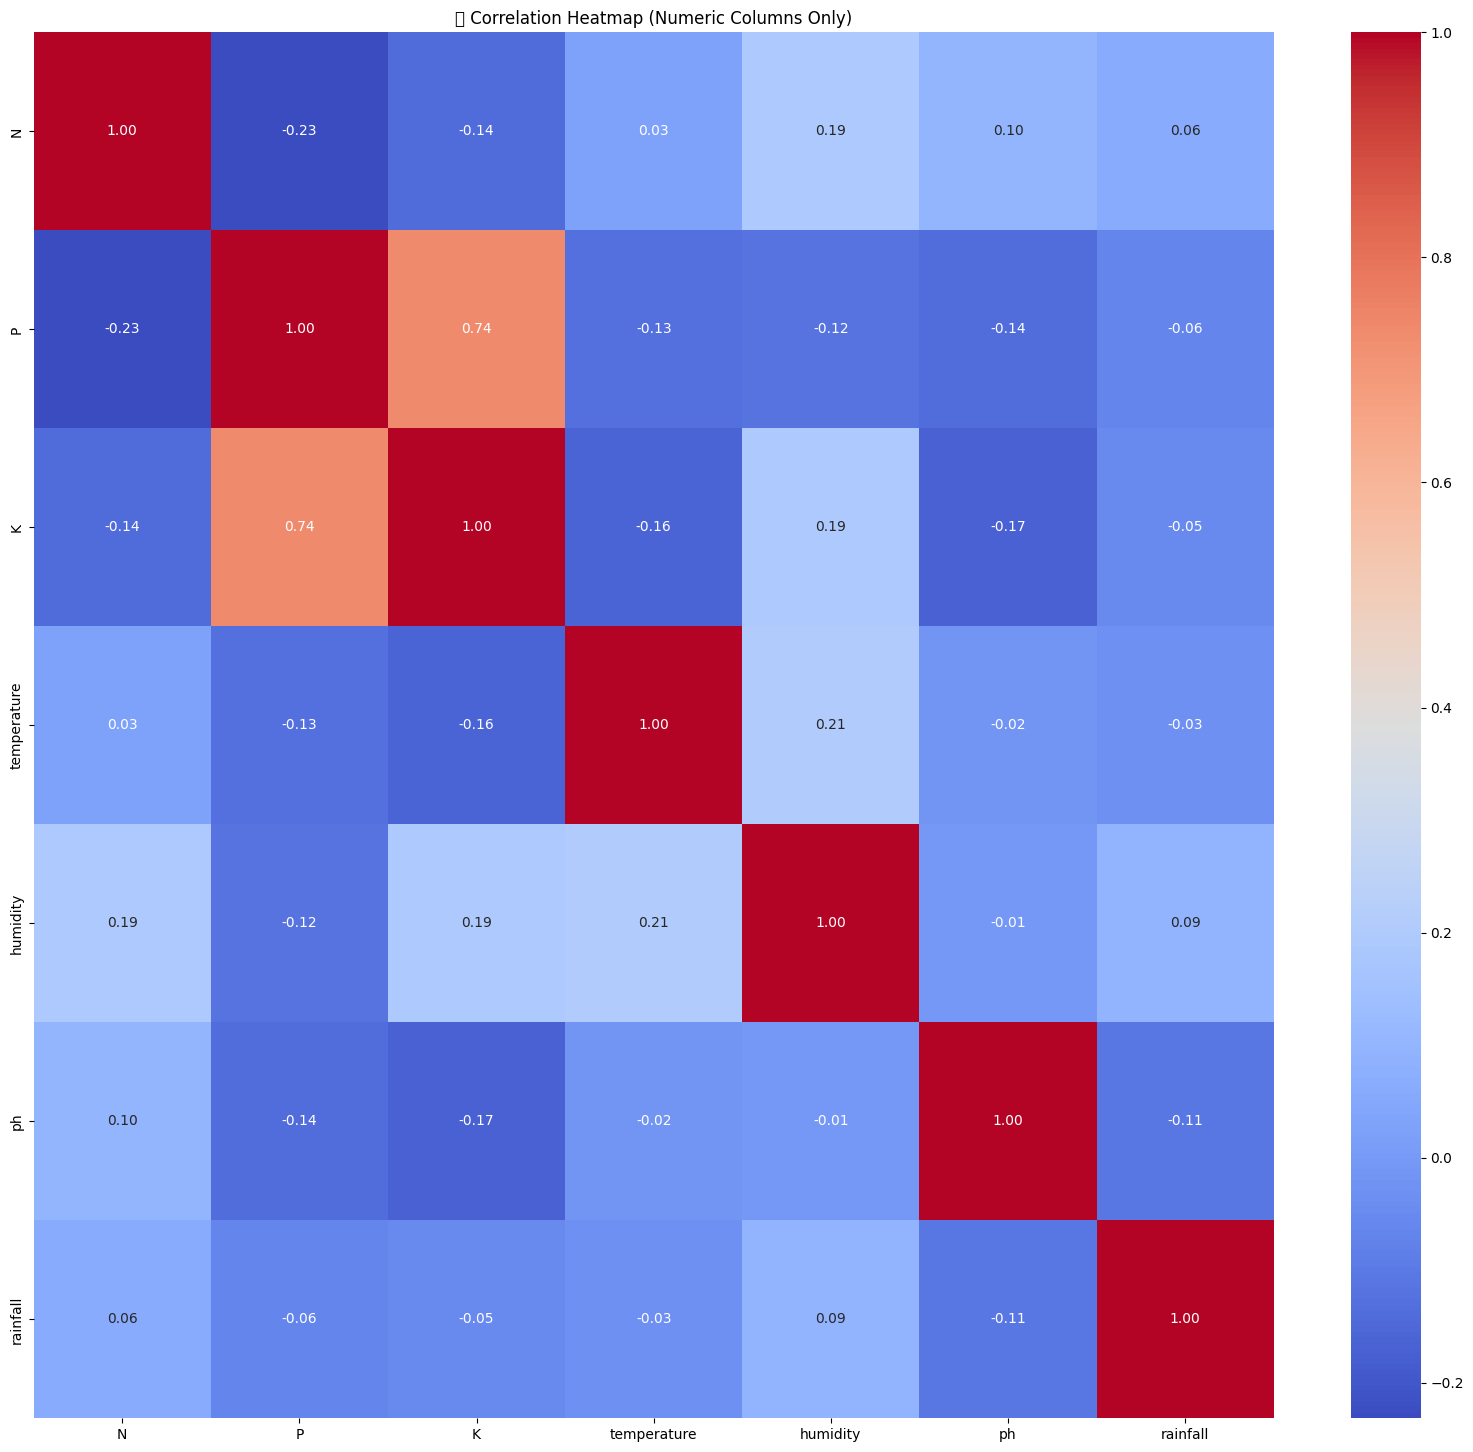

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(20, 18))  # ফিগারের সাইজ নির্ধারণ
# সিলেক্ট শুধুমাত্র নিউমেরিক কলামগুলো
numeric_df = df.select_dtypes(include=np.number)
# নিউমেরিক ডেটার উপর হিটম্যাপ আঁকা হচ্ছে
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("📊 Correlation Heatmap (Numeric Columns Only)")  # টাইটেল
plt.show()  # ✅ গ্রাফ দেখানোর জন্য অবশ্যই দরকার

<Axes: >

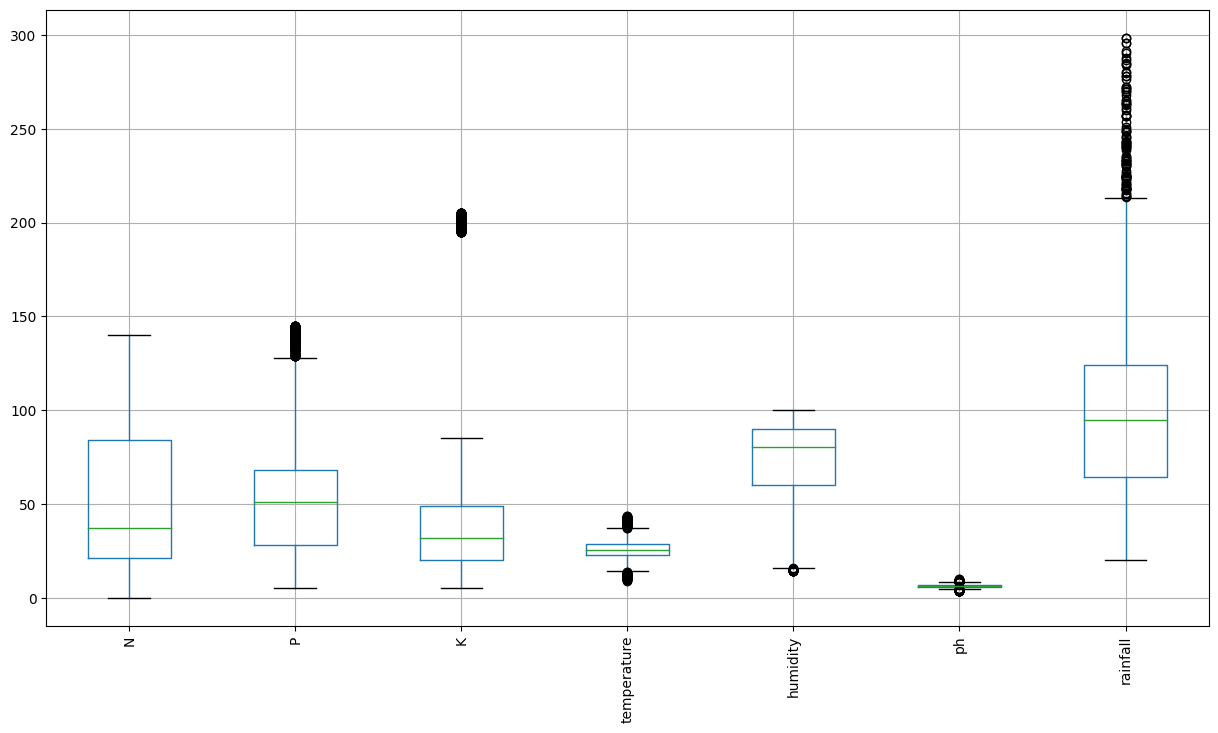

In [12]:
df.boxplot(figsize=(15, 8), rot=90)

In [13]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

# Choose numerical columns for outlier removal
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply outlier removal and store in new DataFrame
df = remove_outliers_iqr(df.copy(), numeric_cols)

# Check shapes
print("Shape before outlier removal:", df.shape)
print("Shape after outlier removal:", df.shape)


Shape before outlier removal: (1846, 8)
Shape after outlier removal: (1846, 8)


In [14]:
df.shape

(1846, 8)

<Axes: >

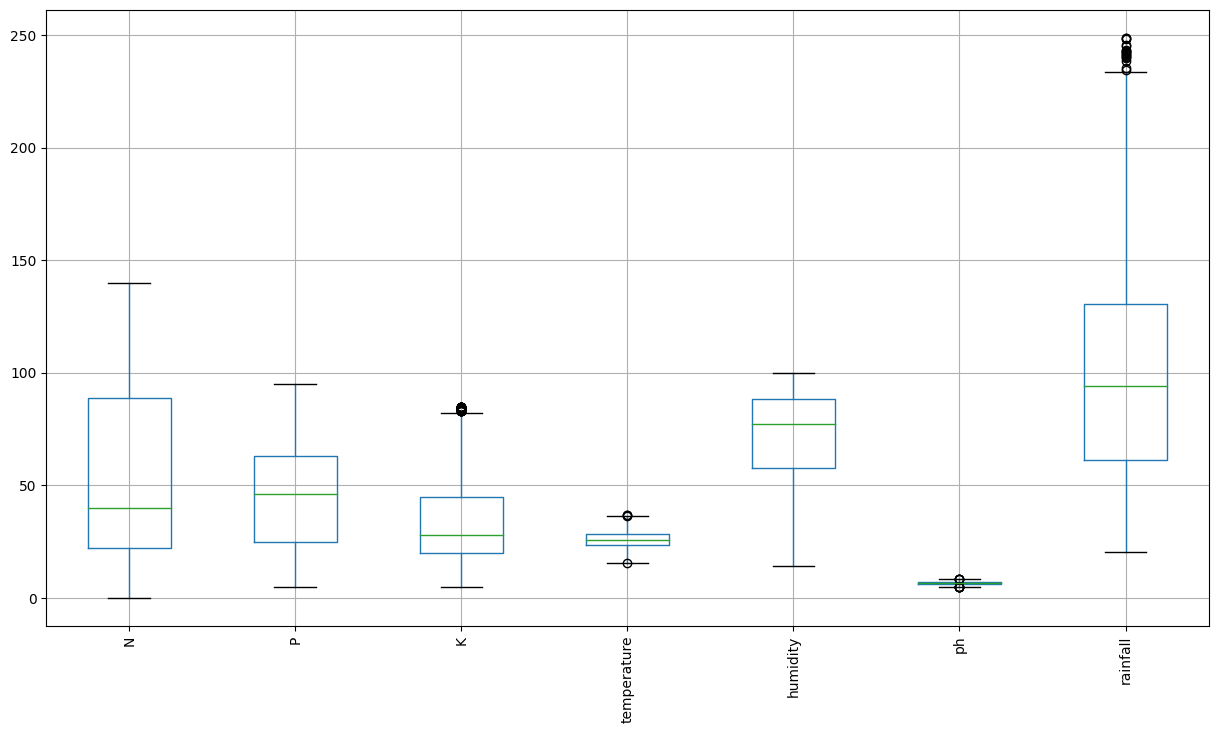

In [15]:
df.boxplot(figsize=(15, 8), rot=90)

In [16]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [17]:
df.rename(columns={
    'N': 'Nitrogen',
    'P': 'Phosphorus',
    'K': 'Potassium'
}, inplace=True)


In [18]:
df.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [19]:
X = df[['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall']]
y = df['label']

In [26]:
# prompt: i want to do label encoding but when I use it in streamlit it should be give me the object label not neumerical

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'label' column
df['label_encoded'] = le.fit_transform(df['label'])

# Now use 'label_encoded' for training and evaluation
y = df['label_encoded']

# You will also need to store the mapping of encoded labels back to original labels
# This mapping is stored in le.classes_
# In your Streamlit app, after prediction, you will use this mapping to display the original label.
# Example: predicted_label_encoded = model.predict(...)
# predicted_label_original = le.inverse_transform([predicted_label_encoded])[0]

# The rest of your code for splitting, training, and evaluating can use y (the encoded labels).
# For Streamlit, you will need to save the trained model and the LabelEncoder object.


✅ Accuracy Score: 0.9918918918918919

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        20
           6       0.77      1.00      0.87        10
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        14
          16      

/opt/anaconda3/envs/mlproject3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/mlproject3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/mlproject3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


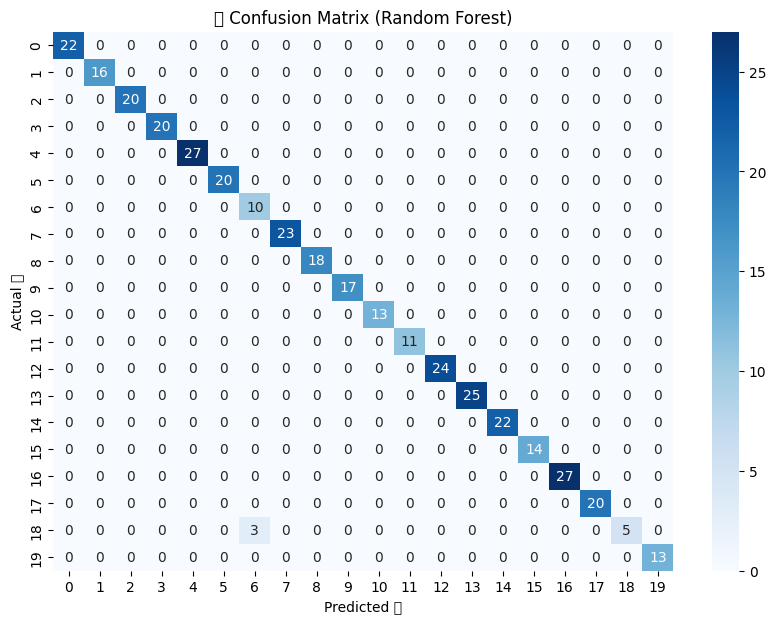

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Remove regression metrics import: r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 📦 স্টেপ ১: ট্রেইন-টেস্ট স্প্লিট
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 স্টেপ ২: মডেল ট্রেইন করছি
model = RandomForestClassifier(random_state=42)  # 🌲 র‍্যান্ডম ফরেস্ট মডেল
model.fit(X_train, y_train)  # 🏋️ মডেল ট্রেইন

# 🔮 স্টেপ ৩: প্রেডিকশন করছি
y_pred = model.predict(X_test)

# ✅ স্টেপ ৪: একিউরেসি স্কোর
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy Score:", accuracy)

# 📋 স্টে ৫: ক্লাসিফিকেশন রিপোর্ট
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# 🔍 স্টে ৬: কনফিউশন ম্যাট্রিক্স প্লট করছি
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("🎯 Confusion Matrix (Random Forest)")
plt.xlabel("Predicted 📈")
plt.ylabel("Actual 🧾")
plt.show()

# 📊 স্টে ৭: রিগ্রেশন টাইপ মেট্রিক হিসাব করছি (যদিও classification model) - ক্লাসিফিকেশন মডেলের জন্য এগুলো অপ্রাসঙ্গিক তাই বাদ দেওয়া হলো
# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# 🧾 ফলাফল প্রিন্ট করছি - রিগ্রেশন মেট্রিক বাদ দেওয়া হয়েছে
# print(f"\n📊 R² Score: {r2:.4f}")
# print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
# print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
# print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

/opt/anaconda3/envs/mlproject3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


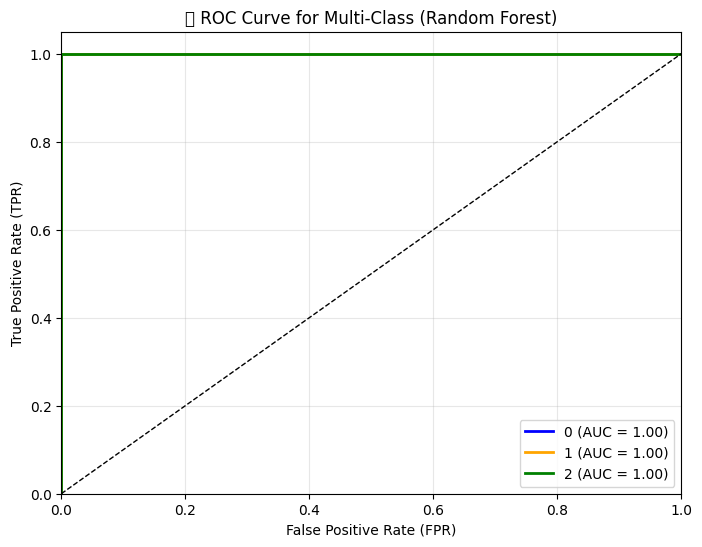


🌈 Macro AUC Score: 1.0000


In [28]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 🔁 স্টেপ ১১: মাল্টিক্লাস টার্গেটকে One-hot encode করছি
y_test_binarized = label_binarize(y_test, classes=model.classes_)  # classes dynamically নিচ্ছি
y_pred_proba = model.predict_proba(X_test)  # 🎯 প্রেডিকশনের প্রোবাবিলিটি নিচ্ছি

# 🎯 Multi-class ROC Curve হিসাব করছি
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])

# 📊 ROC Curve প্লট করছি
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green']  # ক্লাসের সংখ্যা অনুযায়ী বাড়ানো যেতে পারে
labels = model.classes_  # এক্স্যাক্ট লেবেল নিচ্ছি

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")

# 🔲 বেসলাইন
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('🎯 ROC Curve for Multi-Class (Random Forest)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# 🌈 Macro AUC Score (সব ক্লাসের গড় পারফর্মেন্স)
macro_auc = roc_auc_score(y_test_binarized, y_pred_proba, average="macro")
print(f"\n🌈 Macro AUC Score: {macro_auc:.4f}")


✅ Accuracy Score: 0.9702702702702702

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.89      1.00      0.94        16
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       0.96      1.00      0.98        27
           5       0.95      1.00      0.98        20
           6       0.75      0.90      0.82        10
           7       0.88      1.00      0.94        23
           8       0.95      1.00      0.97        18
           9       1.00      0.94      0.97        17
          10       1.00      1.00      1.00        13
          11       1.00      0.73      0.84        11
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        14
          16      

/opt/anaconda3/envs/mlproject3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/mlproject3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/mlproject3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


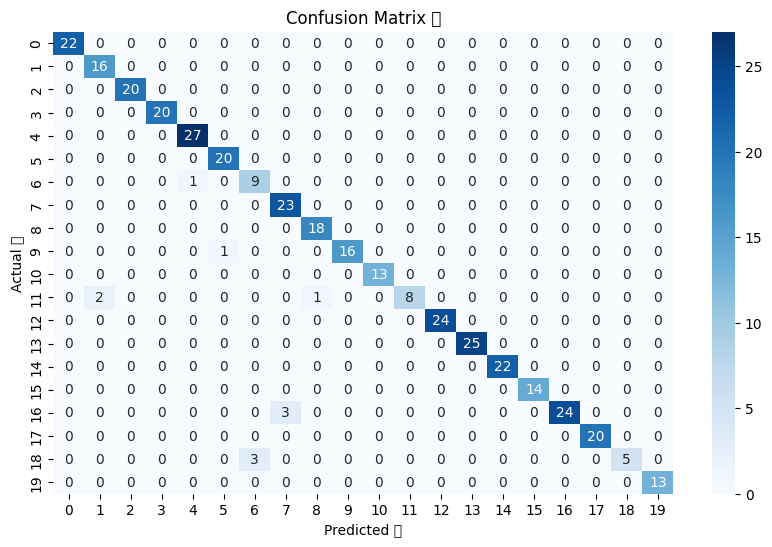

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Removed regression metrics import: r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 📦 ডেটা স্কেল করছি
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📤 ট্রেন-টেস্ট স্প্লিট করছি
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🤖 স্টেপ ৫: KNN মডেল ট্রেইন করছি
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# 🧠 স্টেপ ৬: প্রেডিকশন করছি
y_pred = model.predict(X_test)

# ✅ স্টেপ ৭: একিউরেসি স্কোর বের করছি
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy Score:", accuracy)

# 📋 স্টেপ ৮: ক্লাসিফিকেশন রিপোর্ট
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# 🔍 স্টেপ ৯: কনফিউশন ম্যাট্রিক্স প্লট করছি
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix 🎯")
plt.xlabel("Predicted 📈")
plt.ylabel("Actual 🧾")
plt.show()

# 📊 স্টেপ ১০: রিগ্রেশন টাইপ মেট্রিক হিসাব করছি - ক্লাসিফিকেশন মডেলের জন্য এগুলো অপ্রাসঙ্গিক তাই বাদ দেওয়া হলো
# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# 🧾 ফলাফল প্রিন্ট করছি - রিগ্রেশন মেট্রিক বাদ দেওয়া হয়েছে
# print(f"\n📊 R² Score: {r2:.4f}")
# print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
# print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
# print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

/opt/anaconda3/envs/mlproject3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


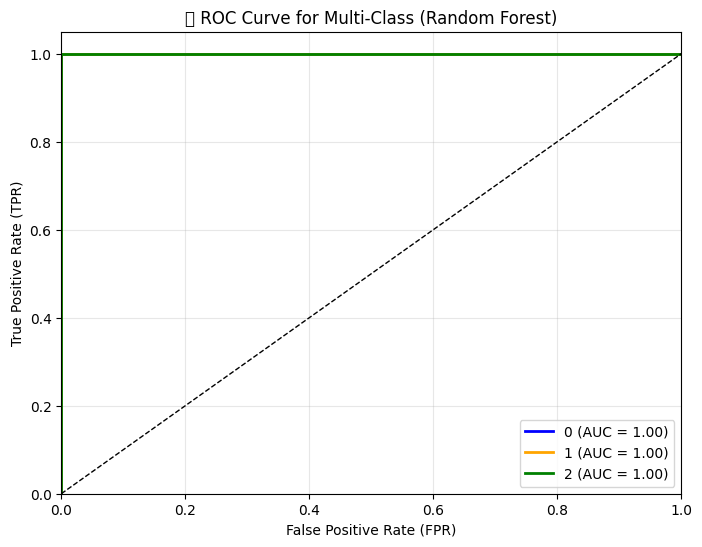


🌈 Macro AUC Score: 0.9965


In [30]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 🔁 স্টেপ ১১: মাল্টিক্লাস টার্গেটকে One-hot encode করছি
y_test_binarized = label_binarize(y_test, classes=model.classes_)  # classes dynamically নিচ্ছি
y_pred_proba = model.predict_proba(X_test)  # 🎯 প্রেডিকশনের প্রোবাবিলিটি নিচ্ছি

# 🎯 Multi-class ROC Curve হিসাব করছি
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])

# 📊 ROC Curve প্লট করছি
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green']  # ক্লাসের সংখ্যা অনুযায়ী বাড়ানো যেতে পারে
labels = model.classes_  # এক্স্যাক্ট লেবেল নিচ্ছি

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")

# 🔲 বেসলাইন
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('🎯 ROC Curve for Multi-Class (Random Forest)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# 🌈 Macro AUC Score (সব ক্লাসের গড় পারফর্মেন্স)
macro_auc = roc_auc_score(y_test_binarized, y_pred_proba, average="macro")
print(f"\n🌈 Macro AUC Score: {macro_auc:.4f}")


In [31]:
import pickle

# স্কেল করা ডেটা নিয়ে ট্রেনিং ধরছি
standard_scaler = StandardScaler()
X_scaled_standard = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_standard, y, test_size=0.2, random_state=42)

# Random Forest Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# ✅ Save Model & Scaler
pickle.dump(model, open("random_forest_model.pkl", "wb"))
pickle.dump(standard_scaler, open("scaler.pkl", "wb"))